<a href="https://colab.research.google.com/github/Boyraci41/Neural-Network/blob/master/MobilNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pylab as plt
import tensorflow as tf
!pip install -q -U tf-hub-nightly
!pip install -q tfds-nightly
import tensorflow_hub as hub

from tensorflow.keras import layers

     |████████████████████████████████| 102kB 5.6MB/s 
     |████████████████████████████████| 3.3MB 7.1MB/s 


In [0]:
classifier_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"

In [0]:
IMAGE_SHAPE = (224,224)

classifier = tf.keras.Sequential([
                                  
                  hub.KerasLayer(classifier_url,input_shape = IMAGE_SHAPE + (3,))
])


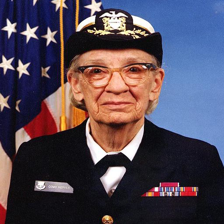

In [9]:
import numpy as np
import PIL.Image as Image

grace_hopper = tf.keras.utils.get_file("image.jpg",'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE) 
grace_hopper

In [10]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

In [24]:
result = classifier.predict(grace_hopper[np.newaxis,...])
result.shape
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

In [25]:
labels_path = tf.keras.utils.get_file("ImageNetLabels.txt",'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
len(imagenet_labels)

1001

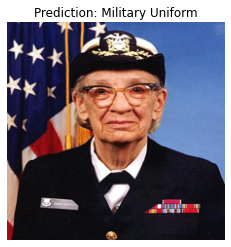

In [26]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

In [28]:
data_root = tf.keras.utils.get_file("flower_photos",'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

228818944/228813984 [==============================] - 4s 0us/step


In [29]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)
image_data = image_generator.flow_from_directory(str(data_root),target_size=IMAGE_SHAPE)


Found 3670 images belonging to 5 classes.


In [31]:
for image_batch,label_batch in image_data:

  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


In [0]:
result_batch =classifier(image_batch)
result_batch

In [36]:
predicted_class_names = imagenet_labels[np.argmax(result_batch,axis = -1)]
predicted_class_names

array(['strawberry', 'rapeseed', 'sea urchin', 'mushroom', 'fountain',
       'daisy', 'daisy', 'pot', 'daisy', 'daisy', 'park bench', 'obelisk',
       'swab', 'daisy', 'daisy', 'cardoon', 'daisy', 'picket fence',
       'daisy', 'vase', 'conch', 'rapeseed', 'cardoon', 'corn', 'vase',
       'picket fence', 'daisy', 'daisy', 'cocker spaniel', 'sea urchin',
       'daisy', 'daisy'], dtype='<U30')

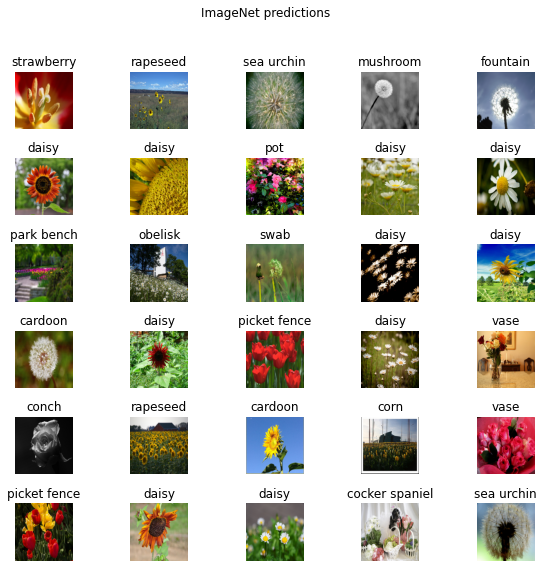

In [37]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")